<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price (\$\)
- ‘originalPrice’ - Product Original Price (\$\)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [107]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

pd.options.display.max_colwidth=200


## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
os.getcwd()

'/content'

In [5]:
product_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Lab/product_data.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Lab/reviews.csv')

In [6]:
product_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
86,B00QHJTOK0,Samsung,Samsung Galaxy Centura SCH-S738C - (Net10),https://www.amazon.com/Samsung-Galaxy-Centura-...,https://m.media-amazon.com/images/I/411mIDKCYz...,1.0000000,https://www.amazon.com/product-reviews/B00QHJTOK0,1,0.0000000,0.0000000
705,B07Z41LHPB,Samsung,Samsung Galaxy Note 10+ Plus 256GB GSM Unlocke...,https://www.amazon.com/Samsung-Galaxy-Unlocked...,https://m.media-amazon.com/images/I/618bEcxx-a...,2.8000000,https://www.amazon.com/product-reviews/B07Z41LHPB,11,659.0000000,0.0000000
448,B07H8QMZWV,Samsung,Samsung Galaxy Note9 Factory Unlocked Phone wi...,https://www.amazon.com/Samsung-Unlocked-Warran...,https://m.media-amazon.com/images/I/716U2tmcWI...,4.1000000,https://www.amazon.com/product-reviews/B07H8QMZWV,1,399.0000000,0.0000000
27,B0081TDISI,Motorola,Motorola Brute i686 Rugged PTT For Sprint,https://www.amazon.com/Motorola-Brute-i686-Rug...,https://m.media-amazon.com/images/I/614NiqhyYO...,2.8000000,https://www.amazon.com/product-reviews/B0081TDISI,10,0.0000000,0.0000000
505,B07MF3JM4T,Motorola,Motorola Moto One - Android One - 64 GB - 13+2...,https://www.amazon.com/Motorola-Moto-One-Smart...,https://m.media-amazon.com/images/I/51Hy0ypovH...,4.1000000,https://www.amazon.com/product-reviews/B07MF3JM4T,199,162.7200000,0.0000000


In [7]:
reviews_df.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
31436,B06XRG6S73,Tochukwu I.,2,"March 25, 2019",True,Most certainly would come with a bad battery,Buy but be warned the battery would come dead ...,nan
6786,B00D99ZBR6,Esmeralda,1,"March 23, 2015",True,I got 99 problems&this phone is one,neighbor got this phone&gave her a lot of prob...,nan
65795,B07VZL3L5V,Ivan,5,"August 14, 2019",True,What a good phone!,I dont need to get another expensive-high leve...,nan
15408,B00V7FY44A,Diamond Russell,1,"July 15, 2016",True,so it is now useless and was a waste of my mon...,"It didn't fit my phone screen, so it is now us...",nan
61161,B07Q84DPZH,R.L.,5,"August 2, 2019",True,Amazing Phone,The phone came with lovely features,nan


In [8]:
product_df.shape

(720, 10)

In [9]:
reviews_df.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [10]:
col = ['url','image','reviewUrl']
product_df.drop(col,inplace=True,axis=1)

In [11]:
product_df.shape

(720, 7)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [111]:
product_df.describe(include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B07JZRL7N5,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G LTE Octa-Core Phone w/ 12.2MP Camera - Just Black,nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [13]:
reviews_df.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

# **Observations:**

- There are 720 unique products are listed with 4 brands are missing names. There are 10 unique Brands are available in the dataset.
- Top Brand is lised as Samsung.
- Top title is Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...
- Range of Rating is from min 1 to max 5, Where the 25% Quantile rating is of 3.3, 50% Quantile rating is of 3.8 and 75% Quantile rating is of 4.1
- Range of price  falls from USD 0.00 to 999.00. On checking the Mobile price with 0.00 $ looks like a replacement Mobile.
- Mean Mobile range is USD 234.00, first Quantile range of mobile price is about USD 97.51, 2nd Quantile range is USD 188.97 and the 3rd Quantile range is USD 188.97
- On Comparing the Mean Sales Price and Mean Original price we can conclude the Mobiles are sold at high cost from their original price.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

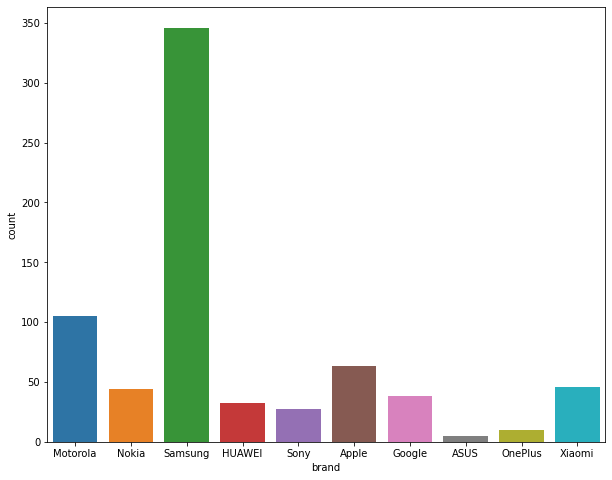

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=product_df,x=product_df.brand,saturation=0.80)

# **Observation:**

-  Looks like Samsung has topped the list with most number of models on comparing with other brands.

- Motorola has the second most number of models.
- Apple is the third among the list.
- Asus has the least number of models in the list.

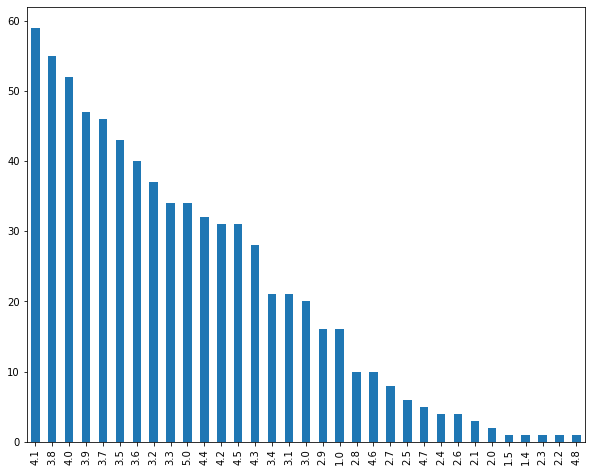

In [114]:
plt.figure(figsize=(10,8))
product_df['rating'].value_counts().sort_values(ascending=False).plot(kind='bar')

# **Observation:**

- Seeing that most of the products has a above average ratings and only few products are with below average ratings.

### 4.5 Display average rating per brand

In [16]:
product_df.groupby('brand')['rating'].mean().sort_values(ascending=False)

brand
Xiaomi     4.4152174
HUAWEI     4.0218750
ASUS       3.8600000
Sony       3.7888889
Apple      3.7825397
Google     3.7710526
Motorola   3.6438095
Samsung    3.6326590
OnePlus    3.5800000
Nokia      3.3863636
Name: rating, dtype: float64

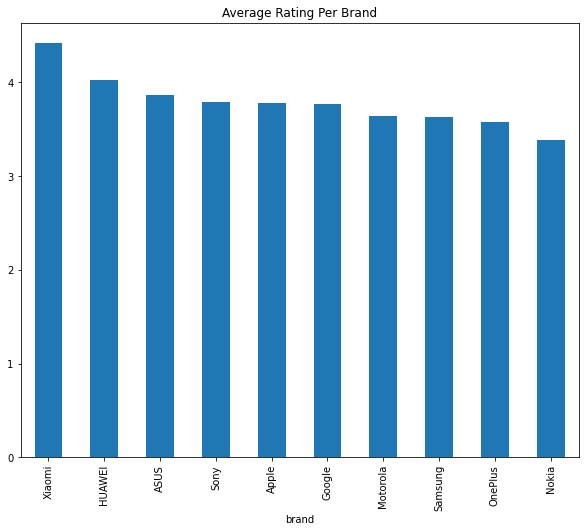

In [17]:
plt.figure(figsize=(10,8))
product_df.groupby('brand')['rating'].mean().sort_values(ascending=False).plot(kind='bar',title="Average Rating Per Brand")

# **Observations:**

- Xiaomi has the average rating as above 4
- All the other brands has the average rating above 3.

### 4.6 Display average price per brand

In [116]:
product_df.groupby('brand')['price'].mean().sort_values(ascending=False)

brand
OnePlus    426.1960000
Sony       332.7248148
ASUS       309.6860000
Apple      303.5811111
Samsung    256.5272543
Google     241.8676316
HUAWEI     218.8290625
Xiaomi     214.9676087
Motorola   139.1210476
Nokia      111.4438636
Name: price, dtype: float64

<Figure size 720x576 with 0 Axes>

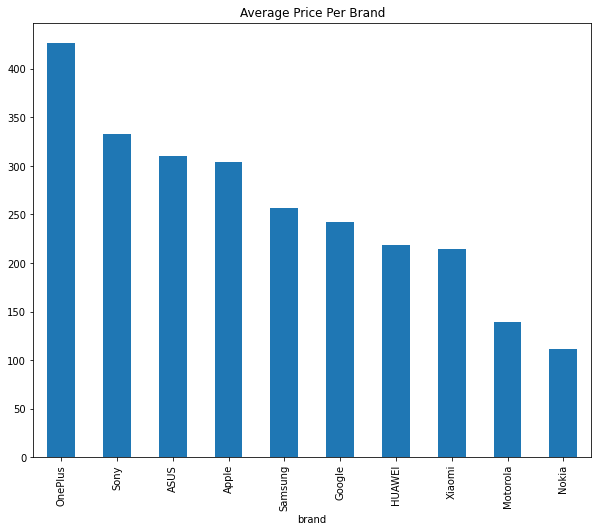

In [117]:
plt.figure(figsize=(10,8))
product_df.groupby('brand')['price'].mean().sort_values(ascending=False).plot(kind='bar',title="Average Price Per Brand")

# **Observations:**

- Oneplus mobiles cost more.
- Nokia is the least priced mobile.

### 4.7 Display average 'totalReviews' per brand

In [20]:
product_df.groupby('brand')['totalReviews'].mean().sort_values(ascending=False)

brand
Nokia      140.5000000
Sony       122.6666667
Xiaomi     121.1739130
Google     111.5263158
Samsung    108.9624277
Apple      100.2380952
Motorola    89.7047619
HUAWEI      77.0937500
ASUS        52.6000000
OnePlus     40.6000000
Name: totalReviews, dtype: float64

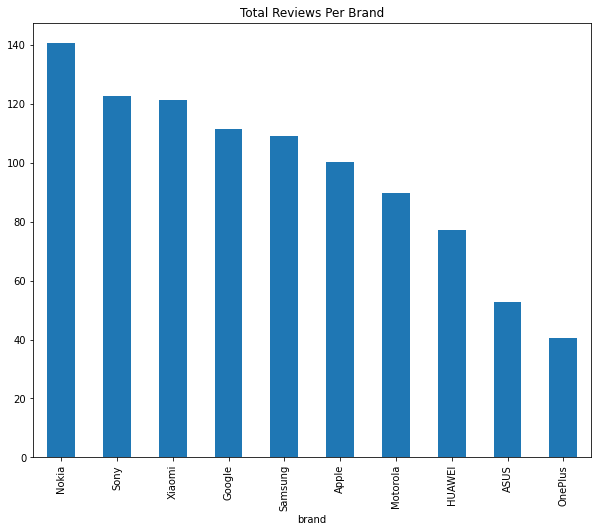

In [118]:
plt.figure(figsize=(10,8))
product_df.groupby('brand')['totalReviews'].mean().sort_values(ascending=False).plot(kind='bar',title="Total Reviews Per Brand")

# **Observations:**

 - Nokia has the most number of reviews.
 - Oneplus has the least number of reviews.

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [22]:
df = pd.merge(reviews_df,product_df,how='left',on='asin')

In [23]:
df.head(5)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


In [24]:
df.shape

(67986, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           67986 non-null  object 
 1   name           67984 non-null  object 
 2   rating_x       67986 non-null  int64  
 3   date           67986 non-null  object 
 4   verified       67986 non-null  bool   
 5   title_x        67972 non-null  object 
 6   body           67965 non-null  object 
 7   helpfulVotes   27215 non-null  float64
 8   brand          67786 non-null  object 
 9   title_y        67986 non-null  object 
 10  rating_y       67986 non-null  float64
 11  totalReviews   67986 non-null  int64  
 12  price          67986 non-null  float64
 13  originalPrice  67986 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 7.3+ MB


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [28]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            67986 non-null  object 
 1   name            67984 non-null  object 
 2   user_rating     67986 non-null  int64  
 3   date            67986 non-null  object 
 4   verified        67986 non-null  bool   
 5   review_title    67972 non-null  object 
 6   body            67965 non-null  object 
 7   helpfulVotes    27215 non-null  float64
 8   brand           67786 non-null  object 
 9   item_title      67986 non-null  object 
 10  overall_rating  67986 non-null  float64
 11  totalReviews    67986 non-null  int64  
 12  price           67986 non-null  float64
 13  originalPrice   67986 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 7.3+ MB


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [30]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [31]:
df_verified = df[df['verified']==True]
df_verified.head(5)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
14,B0009N5L7K,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,nan,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000
17,B0009N5L7K,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,nan,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000
18,B0009N5L7K,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...,nan,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000
21,B000SKTZ0S,Thomas,4,"September 17, 2010",True,"Nice, but",I bought this phone to replace an LG phone tha...,nan,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7000000,22,99.9900000,0.0000000
22,B000SKTZ0S,"Kei, San Jose, CA",1,"May 13, 2017",True,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,nan,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7000000,22,99.9900000,0.0000000


In [123]:
df_verified.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

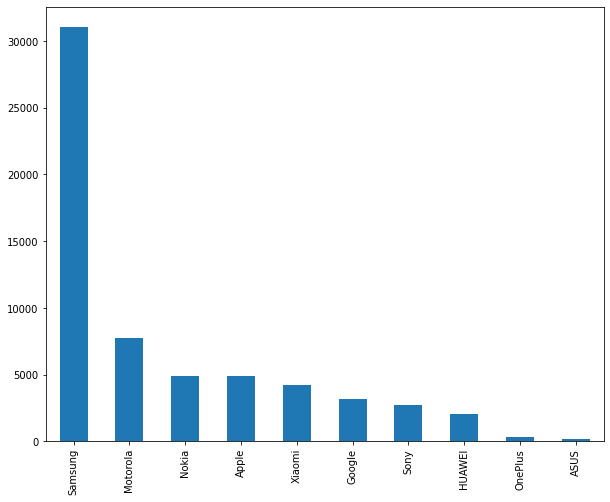

In [119]:
plt.figure(figsize=(10,8))
df_verified['brand'].value_counts().plot(kind ='bar')

# **Observations:**

- Samsung has the most number of reviews nearly 31000 reviews.
- Asus has the least number of reviews.

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [33]:
important_features = ['brand','body','price','user_rating','review_title' ]
df_verified_review = df_verified[important_features]
df_verified_review.head()

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

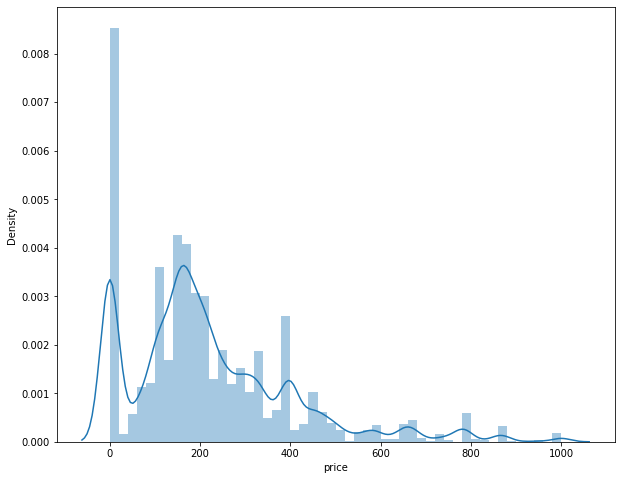

In [120]:
plt.figure(figsize=(10,8))
sns.distplot(df_verified_review['price'])

# **Observation:**
- We can see that most of mobiles are replacements with the price as 0 USD.
- Average mobile price looks to be between 200 USD to 250 USD.

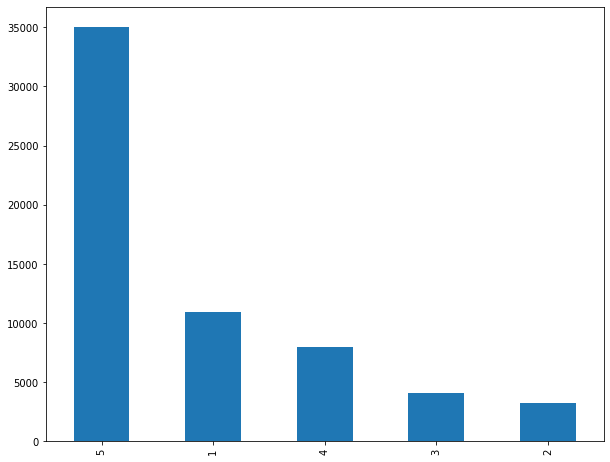

In [121]:
plt.figure(figsize=(10,8))
df_verified_review['user_rating'].value_counts().plot(kind="bar")

# **Observations:**
- Most Verified user has rated 5 star more in number.

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [36]:
df_verified_review['sentiment'] = df_verified_review['user_rating'].apply(lambda x: 1 if x>3 else (0 if x ==3 else -1))

In [39]:
df_verified_review.sample(10)

,brand,body,price,user_rating,review_title,sentiment
22736,Samsung,"I just bought it, and it works great thus far!...",275.9900000,5,and it works great thus far,1
41280,Samsung,Muy bueno,330.9500000,5,👌,1
27885,Samsung,Not a fully unlocked phone. Device did not act...,174.9500000,1,One Star,-1
44838,Google,I did not even power the phone on because the ...,219.9900000,1,"Huge scratch on screen, dirty charge port.",-1
34947,Samsung,I received my phone extremely fast and I have ...,450.1100000,5,Works on the T Mobile network.,1
62292,Samsung,If my title is incomprehensible do some more s...,299.5000000,4,GSM not CDMA,1
38460,Samsung,As far as the Note series goes this is one I'd...,866.3600000,2,Can find this exact model cheaper at Walmart.,-1
47994,HUAWEI,This phone was for my wife.she loves Takeing p...,229.9900000,5,this phone takes amazing pics. it multy tasks ...,1
46444,Samsung,Do not purchase this phone its a fraud and tot...,503.0900000,1,Fraudulent non-functional phones,-1
42974,Samsung,Junk xonnection issues and after a month pink ...,0.0000000,1,Dont buy....runn...,-1


### 4.15 Check frequency distribution of the 'sentiment'

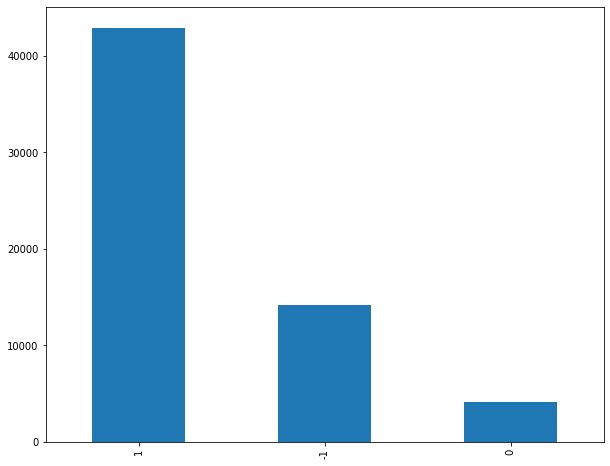

In [122]:
plt.figure(figsize=(10,8))
df_verified_review['sentiment'].value_counts().plot(kind="bar")

# **Observations:**
- Mostly postive reviews from the graph.
- neutral reviews are less in number.

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

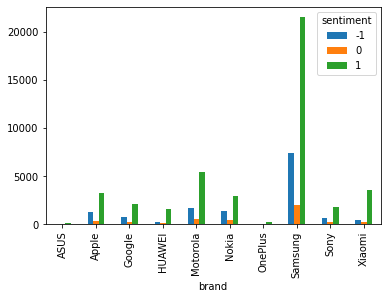

In [43]:
pd.crosstab(df_verified_review['brand'],df_verified_review['sentiment']).plot(kind ='bar')

# **Observations:**

- Asus doesn't have a Positive review.
- Samsung has most number of positive reviews.
- Samsung has most number of negative review.
- Among the reviews Xaomi has most positive reviews that the negative reviews.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [41]:
df_verified_review['body'] = df_verified_review['body'].astype('str')

In [42]:
type(df_verified_review['body'].iloc[0])

str

In [43]:
df_verified_review['body'] = df_verified_review['body'].apply(lambda x: x.lower())

In [44]:
df_verified_review['body'].head(10)

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
23    the phone did not come with a charger and didn...
24                   served me well as a back up phone.
25    i got this phone just as secondary cell phone....
26    sturdy - clarity is great - easy to use only p...
27                                 phone stoped working
Name: body, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [45]:
import re
df_verified_review['body'] = df_verified_review['body'].apply(lambda x: re.sub('[^a-zA-Z\s]','',x,re.I|re.A))

In [46]:
df_verified_review['body'].head(5)

14                              dont buy out of service
17     star because the phones locked so i have to p...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
Name: body, dtype: object

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
wpt = nltk.WordPunctTokenizer()
stop_words = set(nltk.corpus.stopwords.words('english'))
print(stop_words)

{'our', 'how', 'm', 'so', 'having', 'themselves', 'of', 'about', "didn't", 'which', 'yourself', 'out', 'yours', 'myself', 'an', 'we', 'very', 'from', 'than', 'mustn', 're', 'when', 'before', 'and', 'ourselves', 'doing', 'that', 'where', 'not', 'the', 'should', 'yourselves', 'again', 'why', 'up', 'his', 'down', "wouldn't", 'haven', 'there', 'does', 'aren', 'further', 'both', "needn't", 'it', 'he', 'once', 'such', 'i', 'was', "you've", 'her', "wasn't", 'now', 'too', 'most', 'as', 'are', "that'll", 'under', 'each', 'below', 'after', 's', 'these', 'for', 'ain', 'herself', 'am', 'same', "hasn't", 'himself', 'hadn', 'them', 'being', "doesn't", "couldn't", 'itself', "weren't", 'a', "you'll", 'won', 'while', 'have', "it's", 'ours', 'just', 'only', 'can', 'needn', 'your', 'is', 'with', 'shouldn', 'between', "hadn't", 'my', "mustn't", 'she', 'did', 'mightn', 'in', 'were', 'above', 've', "won't", 'by', 'you', 'off', 'don', "shouldn't", 'has', 'shan', 'wasn', 'here', 't', 'll', 'into', 'do', 'woul

In [49]:
df_verified_review['keyword'] = df_verified_review['body'].apply(lambda words : " ".join(word for word in words.split() if word not in stop_words))

In [50]:
df_verified_review['keyword'].head(5)

14                                     dont buy service
17        star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: keyword, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [51]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return " ".join( lemmatizer.lemmatize(w) for w in text.split())


df_verified_review['lemm'] = df_verified_review['keyword'].apply(lambda x: lemmatize_text(x))

In [53]:
df_verified_review.head(5)

,brand,body,price,user_rating,review_title,sentiment,keyword,lemm
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1,dont buy service,dont buy service
17,Motorola,star because the phones locked so i have to p...,49.9500000,1,Phones locked,-1,star phones locked pay additional fees unlock,star phone locked pay additional fee unlock
18,Motorola,the product has been very good i had used this...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...,product good used cell phone one project worke...
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...,bought phone replace lg phone didnt like expec...
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...,purchased phone att phone replacement even tho...


### 5.5 Write a function to check word frequency of the text

In [54]:
def word_freq_count(text):
  words = text.split()
  freqdict = {word: words.count(word) for word in words}
  return freqdict

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [55]:
word_freq = df_verified_review[df_verified_review['sentiment'] == 1]['lemm'].apply(lambda x: word_freq_count(x))

In [56]:
word_freq.head(5)

18    {'product': 1, 'good': 1, 'used': 1, 'cell': 1...
21    {'bought': 1, 'phone': 4, 'replace': 1, 'lg': ...
24      {'served': 1, 'well': 1, 'back': 1, 'phone': 1}
26    {'sturdy': 1, 'clarity': 1, 'great': 1, 'easy'...
28    {'beautiful': 1, 'job': 1, 'used': 1, 'item': ...
Name: lemm, dtype: object

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvectorizer = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
review_vectorizer = tfidvectorizer.fit_transform(df_verified_review['lemm'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [58]:
X = review_vectorizer
Y = df_verified_review['sentiment']

### 5.9 Split the data into Train & Test Sets

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state =5)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier

In [60]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
print("Training Accuracy" , randomForestClassifier.score(X_train, Y_train))
print("Testing Accuracy" , randomForestClassifier.score(X_test, Y_test))

Training Accuracy 0.9948666495554985
Testing Accuracy 0.8565439895470384


In [65]:
y_pred = randomForestClassifier.predict(X_test)

In [80]:
print('Actual Sentiment {}'.format(Y_test.iloc[0]))
if(y_pred[0] ==1):
  print('Positive Sentiment  {}'.format(y_pred[0]))
elif(y_pred[0] == -1):
  print('Negative Sentiment  {}'.format(y_pred[0]))
else:
  print('Neutral Sentiment  {}'.format(y_pred[0]))

Actual Sentiment 1
Positive Sentiment  1


In [124]:
print('Actual Sentiment {}'.format(Y_test.iloc[5]))
if(y_pred[5] == 1):
  print('Positive Sentiment  {}'.format(y_pred[5]))
elif(y_pred[5] == -1):
  print('Negative Sentiment  {}'.format(y_pred[5]))
else:
  print('Neutral Sentiment  {}'.format(y_pred[5]))

Actual Sentiment -1
Negative Sentiment  -1


In [104]:
Y_test.value_counts()

 1    12882
-1     4290
 0     1196
Name: sentiment, dtype: int64

In [102]:
confusion_matrix(y_pred , Y_test)

array([[ 3127,   345,   361],
       [    5,    94,     9],
       [ 1158,   757, 12512]])

| Total=18368 | Actual -1 | Actual 0 | Actual 1|
| --- | --- | --- | --- |
| Predicted  -1   | 3127 | 345 | 361 |
| Predicted  0   | 5 | 94| 9 |
| Predicted  1   | 1158 | 757| 12512 |
| Total   | 4290 | 1196| 12882 |

In [101]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

          -1       0.73      0.82      0.77      3833
           0       0.08      0.87      0.14       108
           1       0.97      0.87      0.92     14427

    accuracy                           0.86     18368
   macro avg       0.59      0.85      0.61     18368
weighted avg       0.92      0.86      0.88     18368



## 7. Write your conclusion

# **Observations:**
-  From the above Confusion matrix, We can conclude the below inferences.
  - Of the Actual 12882 verified users with Positive review, Model has precited 12512 reviews as Positive where the precision (% prediction) positive reviews is about (12512/12882) = 97%.

  - Of the total 1196 verified users with neutral review, Model has predicted only 94 as neutral reviews, where the precision(% prediction) neutral reviews is about(94/1196) =8%

  -  Of the total 4290 negative reviews from the verified customers, Model has predicted 3127 as negative reviews, where the precision (%Prediction) of negative reviews is about (3127/4290) = 73%

  - Among the 3833 predicted as negative reviews, Model found only 3127 as actual Negative comments , 345 predicted as negative sentiments are actually neutral sentiments and 361 are actually postive sentiments, Which leads to Type -2 Error. The total recall is about 3127/3833 = 82%.

  - Among 108 predicted neutral reviews, Model has actual 94 as neutral review but 5 reviews are actually negative and 9 are actually as Postive, the total recall is about 94/108 = 87%.

  - Among the 14427 predicted as positive sentiment, Model has predicted wrongly 1158 actual negative sentiments as Positive and 757 reviews are wrongly predicted as neutral, Which may cause TYpe-2 error in the prediction. The recall is about 12512/14427 = 87%.

  - The training Accuracy is about 99% and Testing accuracy is about 86%.

  - As the model has Type-2 errors in prediction, the overall performance of the model is average. We need to train this model further preprocessing the reviews by removing the accents, removing the repeated characters, Spelling corections and Grammatical error corrections.

  - The models accuracy can further increased by using advance text processing algorithms like Word Embedding (Word2Vec),GLove etc.
